In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.datasets import make_regression

In [6]:
X,y= make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [7]:
X

array([[ 0.0280372 ,  0.16916727],
       [ 0.02489659, -2.40791226],
       [ 0.77982742, -0.84835434],
       ...,
       [ 1.52674777,  0.31839839],
       [ 0.1088862 ,  0.41701216],
       [ 0.84533758, -0.99870073]])

In [8]:
y

array([ 1.89240858e+01, -1.84243388e+02, -2.12684887e+01, -1.01764344e+02,
       -7.54206689e+01,  2.97600171e+00,  2.23106399e+01,  8.08778484e+01,
       -1.00707996e+02, -9.39127182e+01,  6.82936672e+00,  8.37022785e+01,
       -1.31799710e+02,  2.20479396e+01,  1.22507783e+02, -6.72195725e+01,
        1.18343289e+02, -5.29248928e+01,  1.48596004e+02,  1.54613529e+02,
       -1.36775190e+02, -2.53490098e+00, -1.70968154e+02, -4.84514351e+01,
       -5.46391938e+01, -7.33676436e+00, -1.64278057e+02,  1.83717833e+02,
        7.24491187e-01,  9.32126953e+01,  2.05139508e+02, -2.10498923e+02,
        2.72119800e+01,  1.09324748e+02,  5.33402737e+01,  1.09113846e+02,
       -4.66450175e+01,  1.50158780e+02,  1.33623069e+02,  6.92675981e+01,
       -7.15195466e+01, -7.48610778e+00,  7.69032407e+01, -1.76398170e+02,
       -2.53337641e+01,  1.84804427e+02, -8.09104637e+01, -9.21081558e+01,
       -1.88309216e+02, -2.67270019e+01, -2.50917584e+01,  4.38113868e+01,
       -2.42366326e+01, -

In [9]:
df = pd.DataFrame(X)

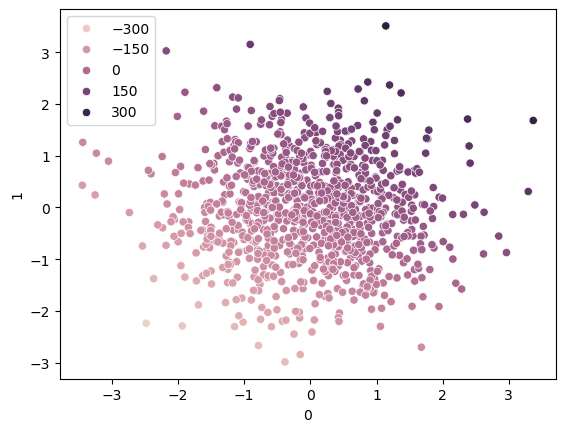

In [10]:
sns.scatterplot(x=df[0],y=df[1],hue=y)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=10,test_size=0.25)

In [12]:
from sklearn.svm import SVR 

In [ ]:
svr= SVR(kernel='linear')

In [14]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [15]:
svr.coef_

array([[57.00200672, 77.67916323]])

In [16]:
# Prediction
y_pred= svr.predict(X_test)

In [17]:
y_pred

array([  76.52202631,  126.23447566,   -3.52170099,   -9.9074726 ,
        -95.86894346, -153.85490087,  104.31954535,  -31.25052841,
         82.33391993,   74.15879944,  -32.87902476,  -73.58350453,
       -288.56436134,  -81.45040432,  -49.40047423, -152.00113825,
       -105.58684825,   -3.71491688,  -60.37358061,   32.68503279,
        -51.20857449,  -48.92509595,   60.65761192,  337.77683031,
         29.49972745,  111.18957859,   12.70251821,  -89.88439941,
          3.7337748 , -137.39326217,   43.15319951,    1.45993724,
         96.7597295 ,  -18.86716991,  -54.12240554,   47.38954962,
         42.02114216,  -70.01707083,  -19.59914945, -190.48658772,
        105.82069092,   74.21513876,  -32.77065666,  -52.26531674,
        144.72859047,  -81.26029305,  -46.24456982,   85.56231121,
         69.97700593,  -22.59324651,  180.9123174 , -121.36831551,
        -46.05827614, -129.38801533,  -34.94713431,   88.87431348,
        -33.03361114,  -71.68341937,  219.14515503, -165.53639

In [18]:
from sklearn.metrics import r2_score

In [19]:
print(r2_score(y_test,y_pred))

0.9991158566695324


# Hyper paramater tuning with SVR

In [20]:
from sklearn.model_selection import GridSearchCV

param={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
     'kernel':['linear'],
     'epsilon':[0.1,0.2,0.3]
    }

In [21]:
grid= GridSearchCV(SVR(),param_grid=param,refit=True,cv=5,verbose=3)

In [22]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.706 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.688 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.702 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.696 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.693 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.706 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.688 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.702 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.696 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.693 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [23]:
grid.best_params_

{'C': 100, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
y_pred